In [1]:
push!(LOAD_PATH, "../../lib");

In [2]:
using NaCsCalc.Format: Unc
using PyPlot
using LsqFit
using SpecialFunctions

In [3]:
data = readcsv("data/Na_big_knife_x.csv", header=true)[1]

31×3 Array{Float64,2}:
 10.0  19.8    0.1  
 10.5  19.9    0.1  
 11.0  19.9    0.1  
 11.5  19.9    0.1  
 12.0  19.8    0.1  
 12.5  19.4    0.1  
 13.0  18.9    0.1  
 13.5  18.4    0.1  
 14.0  17.9    0.1  
 14.5  17.1    0.1  
 15.0  16.3    0.1  
 15.5  15.4    0.1  
 16.0  14.4    0.1  
  ⋮                 
 19.5   6.12   0.03 
 20.0   5.11   0.03 
 20.5   4.2    0.03 
 21.0   3.39   0.03 
 21.5   2.69   0.03 
 22.0   2.1    0.03 
 22.5   1.6    0.03 
 23.0   1.19   0.03 
 23.5   0.855  0.005
 24.0   0.594  0.005
 24.5   0.393  0.005
 25.0   0.233  0.005

In [4]:
# The first few data points includes clipping on the beam from somewhere else.
# Ignore them in the fitting
fitdata = data[8:end, :];

In [5]:
model(x, p) = p[1] .* (erf.(.-(x .- p[2]) ./ p[3] .* sqrt(2)) .+ 1)

model (generic function with 1 method)

In [6]:
fit = curve_fit(model, fitdata[:, 1], fitdata[:, 2], [10.0, 18.0, 3.0])
err = estimate_errors(fit)
@show Unc.(fit.param, err);

Unc.(fit.param, err) = NaCsCalc.Format.Unc{Float64}[10.195(61), 17.790(32), 6.599(57)]


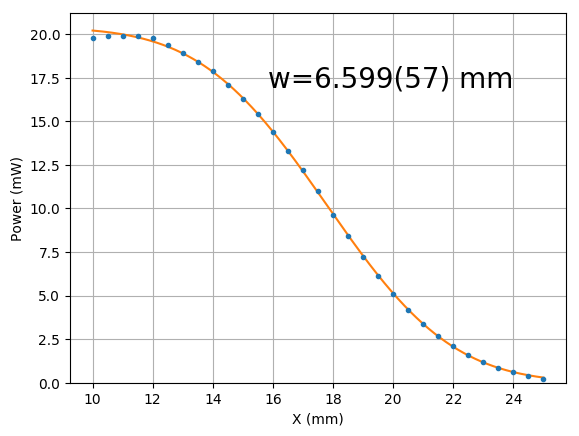

PyObject <matplotlib.text.Annotation object at 0x7f33de38cda0>

In [7]:
errorbar(data[:, 1], data[:, 2], data[:, 3], fmt=".")
plotx = linspace(data[1, 1], data[end, 1], 1000)
plot(plotx, model.(plotx, (fit.param,)))
grid()
ylim([0, ylim()[2]])
xlabel("X (mm)")
ylabel("Power (mW)")
annotate("w=$(Unc(fit.param[3], err[3])) mm", xy=(0.4, 0.8), xycoords="axes fraction",
         size=20)